In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime

In [90]:
path = 'C:/Users/jxjsj/Desktop/东吴金工实习/杠反ETF/工作内容/杠反etf/TW.csv'
o = open(path,'rb')
TW = pd.read_csv(o)

In [91]:
path = 'C:/Users/jxjsj/Desktop/东吴金工实习/杠反ETF/工作内容/杠反etf/HK&SP500.csv'
o = open(path,'rb')
HK_SP = pd.read_csv(o).rename(columns={'Unnamed: 0':'day'})

In [92]:
TW['day'] = TW['day'].apply(lambda x: str(x)[:4]+'-'+str(x)[4:6]+'-'+str(x)[6:8])

tol_df = HK_SP.merge(TW,on=['day'],how='left')

tol_df['TW_Ione_close'] = tol_df['TW_Ione_close'].fillna(method='ffill')

tol_df['TW_Ione_return'] = (tol_df['TW_Ione_close']/tol_df['TW_Ione_close'].shift(1)-1)*100

## 两种序列起点选择
# tol_df_used = tol_df.iloc[:-1,:][['day','HK_Ione_return','SP500_return','TW_Ione_return']].copy()
tol_df_used = tol_df.iloc[:-1,:][['day','HK_Ione_return','SP500_return','TW_Ione_return']].copy().dropna(how='any',axis=0)

tol_df_used['HK_daily_error'] = tol_df_used['HK_Ione_return'] - tol_df_used['SP500_return'].apply(lambda x: -x)

tol_df_used['TW_daily_error'] = tol_df_used['TW_Ione_return'] - tol_df_used['SP500_return'].apply(lambda x: -x)

# tol_df_used_error = tol_df_used.set_index('day').rolling(126).std()
tol_df_used_error = tol_df_used.set_index('day').expanding().std()

tol_df_used_error['TW_vs_HK_error'] = tol_df_used_error['TW_daily_error'] - tol_df_used_error['HK_daily_error']

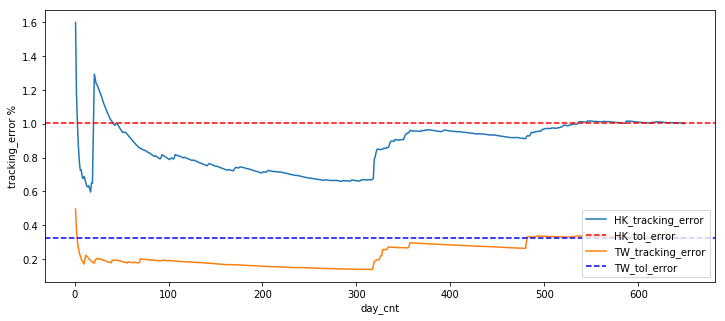

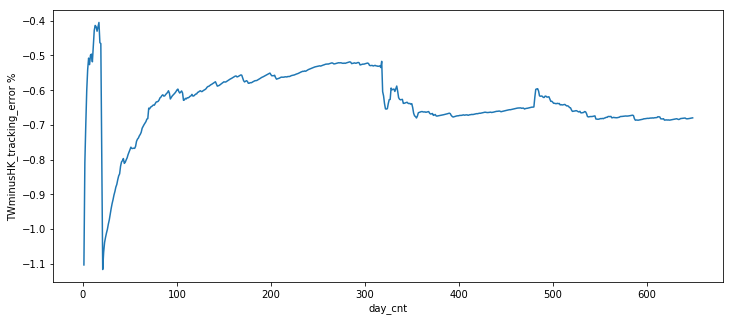

In [93]:
plt.figure(figsize=(12, 5))

plt.plot(tol_df_used_error['HK_daily_error'].tolist(),label='HK_tracking_error')
plt.axhline(tol_df_used.std()['HK_daily_error'], color='r', ls='dashed', lw=1.5,
            label='HK_tol_error')

plt.plot(tol_df_used_error['TW_daily_error'].tolist(),label='TW_tracking_error')
plt.axhline(tol_df_used.std()['TW_daily_error'], color='b', ls='dashed', lw=1.5,
            label='TW_tol_error')

plt.xlabel('day_cnt')
plt.ylabel('tracking_error %')
plt.legend(loc=4)

plt.show()

plt.figure(figsize=(12, 5))
plt.plot(tol_df_used_error['TW_vs_HK_error'].tolist(),label='TW_tracking_error')

plt.xlabel('day_cnt')
plt.ylabel('TWminusHK_tracking_error %')

plt.show()

In [ ]:
tol_df_used_error.to_csv('C:/Users/jxjsj/Desktop/HK_TW_tracking_error.csv')

In [50]:
tol_df_used.to_csv('C:/Users/jxjsj/Desktop/HK_TW_tracking_difference.csv')

In [ ]:
'''
新单元，计算香港台湾杠反etf跟踪误差并比较，同时与主流传统etf对比
'''

In [56]:
sz50 = pd.read_csv('C:/Users/jxjsj/Desktop/sz50.csv').rename(columns={'Unnamed: 0':'day','close':'sz50'})[['day','sz50']]
hs300 = pd.read_csv('C:/Users/jxjsj/Desktop/hs300.csv').rename(columns={'Unnamed: 0':'day','close':'hs300'})[['day','hs300']]
zz500 = pd.read_csv('C:/Users/jxjsj/Desktop/zz500.csv').rename(columns={'Unnamed: 0':'day','close':'zz500'})[['day','zz500']]

tol_df_ = pd.read_csv('C:/Users/jxjsj/Desktop/etfdata.CSV').rename(columns={'Unnamed: 0':'day'})
tol_df_['day'] = tol_df_['day'].apply(lambda x: datetime.datetime.strptime(x,'%Y/%m/%d').strftime('%Y-%m-%d'))

tol_df_0 = tol_df[['day','HK_Ione_close','SP500_close','TW_Ione_close']]
tol_df_0.columns = ['day','hk_1','SP500','tw_1']

tw2 = pd.read_csv('C:/Users/jxjsj/Desktop/tw2.csv').rename(columns={'Unnamed: 0':'day','close':'zz500'}).sort_values('day')
tw2['day'] = tw2['day'].apply(lambda x: str(x)[:4]+'-'+str(x)[4:6]+'-'+str(x)[6:8])

In [58]:
all_data = tol_df_.merge(tol_df_0,on=['day']).merge(sz50,on=['day']).merge(hs300,on=['day']).merge(zz500,on=['day']).merge(tw2,on=['day'])

In [90]:
all_data.to_csv('C:/Users/jxjsj\Desktop/东吴金工实习/杠反ETF/工作内容/(新)杠反ETF报告汇总/原始数据/跟踪误差原始数据/raw_all_data.csv',index=False)

In [2]:
# 读取数据
path = 'C:/Users/jxjsj\Desktop/东吴金工实习/杠反ETF/工作内容/(新)杠反ETF报告汇总/原始数据/跟踪误差原始数据/raw_all_data.csv'
o = open(path,'rb')
all_data = pd.read_csv(o)

In [97]:
['day', 'nfzz500ETF', 'htbr300ETF', 'hxsz50ETF', 'hk2', 'hk_1', 'SP500','tw_1', 'sz50', 'hs300', 'zz500', 'tw2']
['day', 'nfzz500ETF', 'htbr300ETF', 'hxsz50ETF', 'hk_1', 'SP500','tw_1', 'sz50', 'hs300', 'zz500', 'tw2']

['day',
 'nfzz500ETF',
 'htbr300ETF',
 'hxsz50ETF',
 'hk_1',
 'SP500',
 'tw_1',
 'sz50',
 'hs300',
 'zz500',
 'tw2']

In [3]:
all_data_tmp = all_data[['day', 'nfzz500ETF', 'htbr300ETF', 'hxsz50ETF', 'hk_1', 'SP500','tw_1', 'sz50', 'hs300', 'zz500', 'tw2']]
all_data_return = all_data_tmp.set_index('day').pct_change().reset_index().copy()

In [4]:
all_data_return = all_data_return.dropna()

In [124]:
tracking_error_df = pd.DataFrame(index=all_data_return.index)

In [ ]:
'''
主流指数etf跟踪误差，用以比较
'''

In [125]:
all_data_return['nfzz500ETF_d'] = all_data_return['nfzz500ETF'] - all_data_return['zz500']
tracking_error_df['nfzz500ETF_e'] = all_data_return['nfzz500ETF_d'].rolling(126).std()
tracking_error_df['nfzz500ETF_e_'] = all_data_return['nfzz500ETF_d'].expanding().std()

all_data_return['htbr300ETF_d'] = all_data_return['htbr300ETF'] - all_data_return['hs300']
tracking_error_df['htbr300ETF_e'] = all_data_return['htbr300ETF_d'].rolling(126).std()
tracking_error_df['htbr300ETF_e_'] = all_data_return['htbr300ETF_d'].expanding().std()

all_data_return['hxsz50ETF_d'] = all_data_return['hxsz50ETF'] - all_data_return['sz50']
tracking_error_df['hxsz50ETF_e'] = all_data_return['hxsz50ETF_d'].rolling(126).std()
tracking_error_df['hxsz50ETF_e_'] = all_data_return['hxsz50ETF_d'].expanding().std()

In [ ]:
'''
香港台湾杠反跟踪误差
'''

In [174]:
for col in ['hk_1','tw_1']:

    all_data_return[col+'_d'] = all_data_return[col] - all_data_return['SP500']*(-1)
    tracking_error_df[col+'_e'] = all_data_return[col+'_d'].rolling(126).std()
    tracking_error_df[col+'_e_'] = all_data_return[col+'_d'].expanding(126).std()

# for col in ['hk2','tw2']:
for col in ['tw2']:

    all_data_return[col+'_d'] = all_data_return[col] - all_data_return['SP500']*(2)
    tracking_error_df[col+'_e'] = all_data_return[col+'_d'].rolling(126).std()
    tracking_error_df[col+'_e_'] = all_data_return[col+'_d'].expanding(126).std()

In [175]:
tracking_error_df['day'] = all_data_return['day']
tracking_error_df.to_csv('C:/Users/jxjsj\Desktop/东吴金工实习/杠反ETF/工作内容/(新)杠反ETF报告汇总/原始数据/跟踪误差原始数据/tracking_error.csv',index=False)

In [ ]:
'''
跟踪误差结果绘图比较 - 主流完胜！
'''

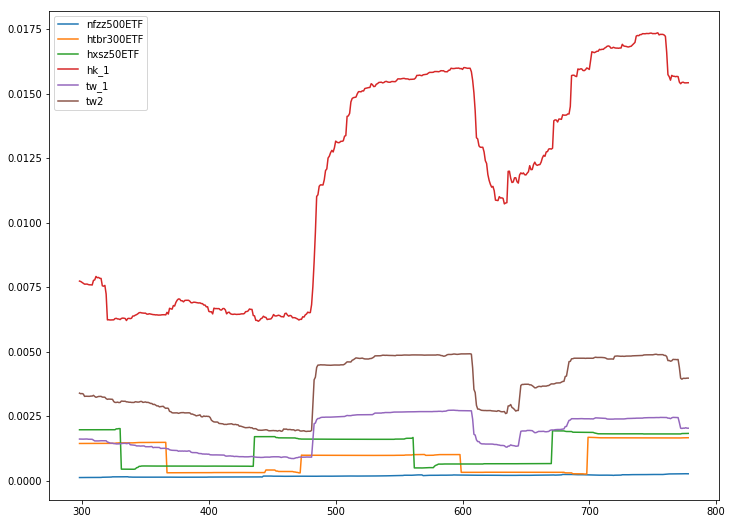

In [176]:
plot_data = tracking_error_df.dropna()
plt.figure(figsize=(12, 9))
for col in ['nfzz500ETF', 'htbr300ETF', 'hxsz50ETF', 'hk_1', 'tw_1', 'tw2']:
    plt.plot(plot_data[col+'_e'],label=col)
plt.legend(loc=0)

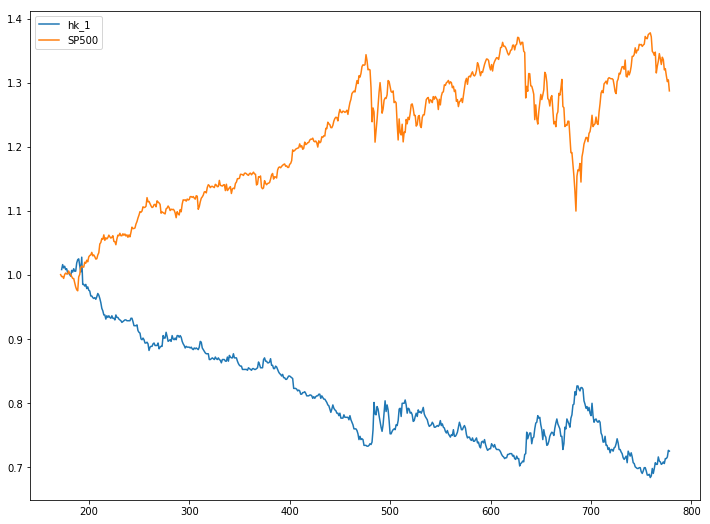

In [156]:
hk_SP = all_data_return[['hk_1','SP500']].apply(lambda x: 1+x).cumprod()
hk_SP['hk_1'] = hk_SP['hk_1'].shift(1)
plt.figure(figsize=(12, 9))
for col in hk_SP.columns:
    plt.plot(hk_SP[col],label=col)
plt.legend(loc=0)

In [ ]:
'''
台湾市场大规模杠反etf跟踪误差 - 旗舰产品
'''

In [35]:
tw50 = pd.read_csv('C:/Users/jxjsj/Desktop/0050.TW.csv').rename(columns={'Date':'day','Adj Close':'tw50'})[['day','tw50']]
tw50['tw50'] = tw50['tw50'].fillna(method = 'ffill')

In [37]:
# 取上市后数日
twbigetf = pd.read_excel('C:/Users/jxjsj/Desktop/twbigetf.xlsx').sort_values('day').iloc[6:,]
twbigetf['day'] = twbigetf['day'].apply(lambda x: str(x)[:4]+'-'+str(x)[4:6]+'-'+str(x)[6:8])

In [38]:
twbig = twbigetf.merge(tw50,on=['day'])
twbig = twbig[twbig['day']<='2019-05-31']

In [39]:
twbig_return = twbig.set_index('day').pct_change().reset_index().dropna()

In [40]:
TW_tracking_error_df = pd.DataFrame(index=twbig_return.index)

col1 = 'twbig2'
twbig_return[col1+'_d'] = twbig_return[col1] - twbig_return['tw50']*(2)
TW_tracking_error_df[col1+'_e'] = twbig_return[col1+'_d'].rolling(126).std()
TW_tracking_error_df[col1+'_e_'] = twbig_return[col1+'_d'].expanding(126).std()

col2 = 'twbig_1'
twbig_return[col2+'_d'] = twbig_return[col2] - twbig_return['tw50']*(-1)
TW_tracking_error_df[col2+'_e'] = twbig_return[col2+'_d'].rolling(126).std()
TW_tracking_error_df[col2+'_e_'] = twbig_return[col2+'_d'].expanding(126).std()

TW_tracking_error_df['day'] = twbig_return['day']

In [47]:
TW_tracking_error_df.merge(twbig,on=['day'],how='left').to_csv('C:/Users/jxjsj\Desktop/东吴金工实习/杠反ETF/工作内容/(新)杠反ETF报告汇总/原始数据/跟踪误差原始数据/TW_tracking_error.csv',index=False)

In [ ]:
twbig_return_std = twbig_return.set_index('day').rolling(126).std().reset_index().rename(columns={'tw50':'tw50std'})

plt_tw_error_jump_df = twbig_return_std[['tw50std','day']].merge(TW_tracking_error_df[['twbig2_e','twbig_1_e','day']],on=['day']).set_index('day')

def rolling_corr(df):
    df = df.copy()
    day_list = df.index.tolist()
    wind = 126
    save_dict = {}
    for i in range(len(day_list)):
        day_end = day_list[i]
        df_sub = df[df.index<=day_end].dropna()
        if len(df_sub) < wind:
            pass
        else:
            corr_mat = df_sub.corr()
            corrtw50std2e = corr_mat['tw50std']['twbig2_e']
            corrtw50std_1e = corr_mat['tw50std']['twbig_1_e']
            save_dict[day_end] = [corrtw50std2e,corrtw50std_1e]
    save_df = pd.DataFrame.from_dict(save_dict,orient='index').rename(columns={0:'corrtw50std2e',1:'corrtw50std_1e'}).reset_index().rename(columns={'index':'day'})
    return save_df

corr_std_e = plt_tw_error_jump_df.merge(rolling_corr(plt_tw_error_jump_df),on=['day'],how='left')

plt.figure(figsize=(15,9))
plt.plot(corr_std_e['tw50std']*100,label='std')
plt.plot(corr_std_e['twbig2_e']*100,label='track_2e')
plt.plot(corr_std_e['corrtw50std2e'],label='corrtw50std2e')
plt.plot(corr_std_e['corrtw50std_1e'],label='corrtw50std_1e')
plt.legend(loc=0)

corr_std_e.to_csv('C:/Users/jxjsj\Desktop/东吴金工实习/杠反ETF/工作内容/(新)杠反ETF报告汇总/原始数据/跟踪误差原始数据/corr_std_e.csv',index=False)

In [ ]:
'''
香港市场大规模杠反etf跟踪误差 - 旗舰产品
'''

In [22]:
hkbig = pd.read_excel('C:/Users/jxjsj/Desktop/hkbigetf.xlsx').sort_values('day')

In [23]:
hkbig = hkbig[hkbig['day']<='2019-05-31']

In [24]:
hkbig_return = hkbig.set_index('day').pct_change().reset_index().dropna()

In [25]:
HK_tracking_error_df = pd.DataFrame(index=hkbig_return.index)

col1 = 'hsi2'
hkbig_return[col1+'_d'] = hkbig_return[col1] - hkbig_return['his']*(2)
HK_tracking_error_df[col1+'_e'] = hkbig_return[col1+'_d'].rolling(126).std()
HK_tracking_error_df[col1+'_e_'] = hkbig_return[col1+'_d'].expanding(126).std()

col2 = 'hsi_1'
hkbig_return[col2+'_d'] = hkbig_return[col2] - hkbig_return['his']*(-1)
HK_tracking_error_df[col2+'_e'] = hkbig_return[col2+'_d'].rolling(126).std()
HK_tracking_error_df[col2+'_e_'] = hkbig_return[col2+'_d'].expanding(126).std()

HK_tracking_error_df['day'] = hkbig_return['day']

In [14]:
HK_tracking_error_df.merge(hkbig,on=['day'],how='left').to_csv('C:/Users/jxjsj\Desktop/东吴金工实习/杠反ETF/工作内容/(新)杠反ETF报告汇总/原始数据/跟踪误差原始数据/HK_tracking_error.csv',index=False)

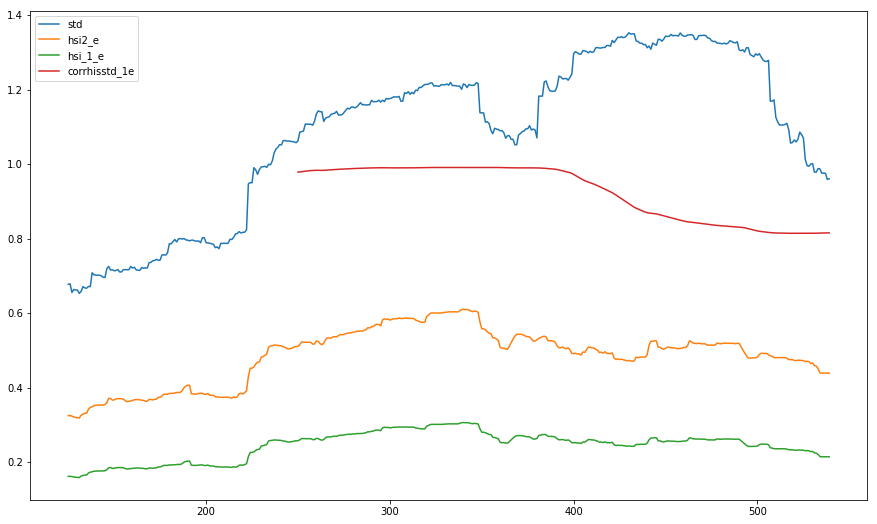

In [106]:
hkbig_return_std = hkbig_return.set_index('day').rolling(126).std().reset_index().rename(columns={'his':'hisstd'})

plt_hk_error_jump_df = hkbig_return_std[['hisstd','day']].merge(HK_tracking_error_df[['hsi2_e','hsi_1_e','day']],on=['day']).set_index('day')

def rolling_corr(df):
    df = df.copy()
    day_list = df.index.tolist()
    wind = 126
    save_dict = {}
    for i in range(len(day_list)):
        day_end = day_list[i]
        df_sub = df[df.index<=day_end].dropna()
        if len(df_sub) < wind:
            pass
        else:
            corr_mat = df_sub.corr()
            corrtw50std2e = corr_mat['hisstd']['hsi2_e']
            corrtw50std_1e = corr_mat['hisstd']['hsi_1_e']
            save_dict[day_end] = [corrtw50std2e,corrtw50std_1e]
    save_df = pd.DataFrame.from_dict(save_dict,orient='index').rename(columns={0:'corrhisstd2e',1:'corrhisstd_1e'}).reset_index().rename(columns={'index':'day'})
    return save_df

corr_std_e = plt_hk_error_jump_df.merge(rolling_corr(plt_hk_error_jump_df),on=['day'],how='left')

plt.figure(figsize=(15,9))
plt.plot(corr_std_e['hisstd']*100,label='std')
plt.plot(corr_std_e['hsi2_e']*100,label='hsi2_e')
plt.plot(corr_std_e['hsi_1_e']*100,label='hsi_1_e')
plt.plot(corr_std_e['corrhisstd_1e'],label='corrhisstd_1e')
plt.legend(loc=0)

corr_std_e.to_csv('C:/Users/jxjsj\Desktop/东吴金工实习/杠反ETF/工作内容/(新)杠反ETF报告汇总/原始数据/跟踪误差原始数据/hk_corr_std_e.csv',index=False)

In [53]:
'''
新单元
台湾50，沪深300，标普500 - 杠反2x 1x 产品与普通产品（1x）跟踪误差对比
'''

In [10]:
strat = '2016-10-11'
end = '2019-06-30'

In [ ]:
'''
台湾
'''

In [3]:
tw50 = pd.read_excel('C:/Users/jxjsj/Desktop/tw50.xlsx')
tw50['day'] = tw50['day'].apply(lambda x: str(x)[:4]+'-'+str(x)[4:6]+'-'+str(x)[6:8])
twhs300 = pd.read_excel('C:/Users/jxjsj/Desktop/twhs300.xlsx')
twhs300['day'] = twhs300['day'].apply(lambda x: str(x)[:4]+'-'+str(x)[4:6]+'-'+str(x)[6:8])
twhs300_ = pd.read_excel('C:/Users/jxjsj/Desktop/twhs300_.xlsx')
twhs300_['day'] = twhs300_['day'].apply(lambda x: str(x)[:4]+'-'+str(x)[4:6]+'-'+str(x)[6:8])
twsp500 = pd.read_excel('C:/Users/jxjsj/Desktop/twsp500.xlsx')
twsp500['day'] = twsp500['day'].apply(lambda x: str(x)[:4]+'-'+str(x)[4:6]+'-'+str(x)[6:8])

tw50_index = pd.read_csv('C:/Users/jxjsj/Desktop/0050.TW.csv').rename(columns={'Date':'day','Adj Close':'台湾50指数'})[['day','台湾50指数']]
hs300_sp500 = pd.read_excel('C:/Users/jxjsj/Desktop/hketf.xlsx')[['标普500指数','沪深300指数','day']]
hs300_sp500['day'] = hs300_sp500['day'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [4]:
twhs300fund = hs300_sp500.merge(twhs300_,on=['day'],how='left')
twhs300fund = twhs300fund.set_index('day')
twhs300fund_return = twhs300fund.pct_change()
twhs300fund_tracking_error = pd.DataFrame(index=twhs300fund_return.index)
twhs300fund_tracking_error['元大标智沪深300'] = (twhs300fund_return['元大标智沪深300'] - twhs300fund_return['沪深300指数']).expanding().std()

In [5]:
tw_equity = tw50.merge(twsp500,on=['day'],how='left').merge(twhs300,on=['day'],how='left').merge(twhs300_,on=['day'],how='left')

In [6]:
tw_equity = (tw_equity.merge(tw50_index,on=['day'],how='left').merge(hs300_sp500,on=['day'],how='left')).sort_values('day').fillna(method='ffill')

In [7]:
# tw_equity = pd.read_excel('C:/Users/jxjsj/Desktop/twetf.xlsx')
# tw_equity['day'] = tw_equity['day'].apply(lambda x: str(x)[:4]+'-'+str(x)[4:6]+'-'+str(x)[6:8])
# tw_equity = tw_equity.sort_values('day').dropna().merge(tw50,on=['day']).merge(hs300_sp500,on=['day'])
tw_equity = tw_equity.set_index('day')
tw_return = tw_equity.pct_change().dropna()

In [148]:
tw_return.columns

Index(['元大台湾50单日正向2倍', '元大台湾50单日反向1倍', '元大台湾卓越50', '元大标普500单日正向2倍',
       '元大标普500单日反向1倍', '元大标普500基金', '元大沪深300单日正向2倍', '元大沪深300单日反向1倍',
       '元大标智沪深300', '台湾50指数', '标普500指数', '沪深300指数'],
      dtype='object')

In [11]:
tw_return_ = tw_return[(tw_return.index>=strat) & (tw_return.index<=end)]

In [12]:
tw_tracking_error = pd.DataFrame(index=tw_return_.index)
tw_tracking_error['元大台湾卓越50'] = (tw_return_['元大台湾卓越50'] - tw_return_['台湾50指数']).expanding().std()
tw_tracking_error['元大台湾50单日正向2倍'] = (tw_return_['元大台湾50单日正向2倍']/2 - tw_return_['台湾50指数']).expanding().std()
tw_tracking_error['元大台湾50单日反向1倍'] = (tw_return_['元大台湾50单日反向1倍'] - tw_return_['台湾50指数']*(-1)).expanding().std()

tw_tracking_error['元大标智沪深300'] = (tw_return_['元大标智沪深300'] - tw_return_['沪深300指数']).expanding().std()
tw_tracking_error['元大沪深300单日正向2倍'] = (tw_return_['元大沪深300单日正向2倍']/2 - tw_return_['沪深300指数']).expanding().std()
tw_tracking_error['元大沪深300单日反向1倍'] = (tw_return_['元大沪深300单日反向1倍'] - tw_return_['沪深300指数']*(-1)).expanding().std()

tw_tracking_error['元大标普500基金'] = (tw_return_['元大标普500基金'] - tw_return_['标普500指数']).expanding().std()
tw_tracking_error['元大标普500单日正向2倍'] = (tw_return_['元大标普500单日正向2倍']/2 - tw_return_['标普500指数']).expanding().std()
tw_tracking_error['元大标普500单日反向1倍'] = (tw_return_['元大标普500单日反向1倍'] - tw_return_['标普500指数']*(-1)).expanding().std()

In [14]:
tw_tracking_error.to_csv('C:/Users/jxjsj\Desktop/东吴金工实习/杠反ETF/工作内容/(新)杠反ETF报告汇总/原始数据/跟踪误差原始数据/港台内地etf跟踪误差/tw_tracking_error.csv',index=True,encoding='gbk')
tw_equity.to_csv('C:/Users/jxjsj\Desktop/东吴金工实习/杠反ETF/工作内容/(新)杠反ETF报告汇总/原始数据/跟踪误差原始数据/港台内地etf跟踪误差/tw_equity.csv',index=True,encoding='gbk')

In [19]:
rolling_tw_tracking_error = pd.DataFrame(index=tw_return_.index)
rolling_tw_tracking_error['元大标普500单日正向2倍'] = (tw_return_['元大标普500单日正向2倍']/2 - tw_return_['标普500指数']).rolling(126).std()
rolling_tw_tracking_error['元大标普500单日反向1倍'] = (tw_return_['元大标普500单日反向1倍']/(-1) - tw_return_['标普500指数']).rolling(126).std()
rolling_tw_tracking_error['元大标普500基金'] = (tw_return_['元大标普500基金'] - tw_return_['标普500指数']).rolling(126).std()
rolling_tw_tracking_error.to_csv('C:/Users/jxjsj\Desktop/东吴金工实习/杠反ETF/工作内容/(新)杠反ETF报告汇总/原始数据/跟踪误差原始数据/港台内地etf跟踪误差/rolling_tw_tracking_error.csv',index=True,encoding='gbk')

In [ ]:
'''
香港
'''

In [45]:
hk_equity = pd.read_excel('C:/Users/jxjsj/Desktop/hketf.xlsx')
hk_equity['day'] = hk_equity['day'].apply(lambda x: x.strftime('%Y-%m-%d'))
hk_equity['未来资产标普500每日反向1倍'] = hk_equity['未来资产标普500每日反向1倍'].apply(lambda x: np.nan if x==0 else x)
hk_equity = hk_equity.dropna().set_index('day')

In [46]:
hk_return = hk_equity.pct_change().dropna()

In [47]:
hk_return_ = hk_return[(hk_return.index>=strat) & (hk_return.index<=end)]

In [48]:
hk_tracking_error = pd.DataFrame(index=hk_return_.index)
hk_tracking_error['华夏沪深三百'] = (hk_return_['华夏沪深三百'] - hk_return_['沪深300指数']).expanding().std()
hk_tracking_error['领航标普500'] = (hk_return_['领航标普500'] - hk_return_['标普500指数']).expanding().std()
hk_tracking_error['未来资产标普500每日反向1倍'] = (hk_return_['未来资产标普500每日反向1倍'] - hk_return_['标普500指数']*(-1)).expanding().std()

In [49]:
hk_tracking_error.to_csv('C:/Users/jxjsj\Desktop/东吴金工实习/杠反ETF/工作内容/(新)杠反ETF报告汇总/原始数据/跟踪误差原始数据/港台内地etf跟踪误差/hk_tracking_error.csv',index=True,encoding='gbk')
hk_equity.to_csv('C:/Users/jxjsj\Desktop/东吴金工实习/杠反ETF/工作内容/(新)杠反ETF报告汇总/原始数据/跟踪误差原始数据/港台内地etf跟踪误差/hk_equity.csv',index=True,encoding='gbk')

In [ ]:
'''
内地
'''

In [50]:
cn_equity = pd.read_excel('C:/Users/jxjsj/Desktop/cnetf.xlsx')
cn_equity['day'] = cn_equity['day'].apply(lambda x: x.strftime('%Y-%m-%d'))
cn_equity = cn_equity.dropna().set_index('day')

In [51]:
cn_return = cn_equity.pct_change().dropna()

In [52]:
cn_return_ = cn_return[(cn_return.index>=strat) & (cn_return.index<=end)]

In [53]:
cn_tracking_error = pd.DataFrame(index=cn_return_.index)
cn_tracking_error['华夏沪深300ETF'] = (cn_return_['华夏沪深300ETF'] - cn_return_['沪深300']).expanding().std()
cn_tracking_error['华泰柏瑞沪深300ETF'] = (cn_return_['华泰柏瑞沪深300ETF'] - cn_return_['沪深300']).expanding().std()
cn_tracking_error['嘉实沪深300ETF'] = (cn_return_['嘉实沪深300ETF'] - cn_return_['沪深300']).expanding().std()
cn_tracking_error['博时标普500ETF'] = (cn_return_['博时标普500ETF'] - cn_return_['标普500']).expanding().std()

In [54]:
cn_tracking_error.to_csv('C:/Users/jxjsj\Desktop/东吴金工实习/杠反ETF/工作内容/(新)杠反ETF报告汇总/原始数据/跟踪误差原始数据/港台内地etf跟踪误差/cn_tracking_error.csv',index=True,encoding='gbk')
cn_equity.to_csv('C:/Users/jxjsj\Desktop/东吴金工实习/杠反ETF/工作内容/(新)杠反ETF报告汇总/原始数据/跟踪误差原始数据/港台内地etf跟踪误差/cn_equity.csv',index=True,encoding='gbk')